In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import SGD, adam
import scipy.io as sio

Using TensorFlow backend.


In [2]:
val_set = {}
val_set['received'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\val_received')['received_set']
val_set['clean'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\val_clean')['clean_set']
val_set['snr'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\val_snr')['snr_set']
val_set['label'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\val_label')['label_set']
x = np.zeros([val_set['received'].shape[0],2,val_set['received'].shape[1]])
x[:,0,:]=np.real(val_set['received'])
x[:,1,:]=np.imag(val_set['received'])
y = np.zeros([val_set['received'].shape[0],2,val_set['received'].shape[1]])
y[:,0,:]=np.real(val_set['clean'])
y[:,1,:]=np.imag(val_set['clean'])

In [3]:
import model.ddn as my_model
unet_side_fuse = my_model.u_net_side_fuse()
unet_side_fuse.load_weights('.\\weights\\uNet_evmloss.h5')

D:\python-wing-personal\script\MR_4\model\ddn.py:114: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 4), kernel_initializer="he_normal", strides=(1, 1), padding="same", activation=None, name="input_layer")`
  name='input_layer', padding='same', activation=None)(inp)
D:\python-wing-personal\script\MR_4\model\ddn.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, kernel_initializer="he_normal", strides=(1, 1), kernel_size=(1, 1), padding="same", activation=None, name="s1_block_conv_1")`
  name=name+'_conv_1', padding='same', activation=None)(inp)
D:\python-wing-personal\script\MR_4\model\ddn.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, kernel_initializer="he_normal", strides=(1, 1), kernel_size=(1, 4), padding="same", activation=None, name="s1_block_conv_2")`
  name=name+'_conv_2', padding='same', activation=None)(out)
D:\python-wing-personal\script\MR_4\model\ddn.py:37: UserWarning: Update your `Conv

In [4]:
x = x[:1000]
y = y[:1000]

In [5]:
out_shape = list(x.shape)
inp_shape = np.append(out_shape, 1)
x = x.reshape(inp_shape)
print(x.shape)

(1000, 2, 1024, 1)


In [6]:
y_hat = unet_side_fuse.predict(x)

In [8]:
y_hat = y_hat[3]
import tensorflow as tf
from keras import backend as K
def evm_loss(y_true, y_pred):
    evm = K.sum(K.square(y_pred-y_true), axis=[3,2,1])
    return K.mean(evm, axis=0)
y = y.reshape(inp_shape)
sess = tf.Session()
print(sess.run(evm_loss(y, y_hat)))
x = x.reshape(out_shape)
y = y.reshape(out_shape)
y_hat = y_hat.reshape(out_shape)

31.1658892206


In [9]:
x = x.reshape(out_shape)
y = y.reshape(out_shape)
y_hat = y_hat.reshape(out_shape)

[-6]


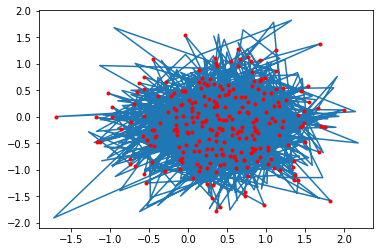

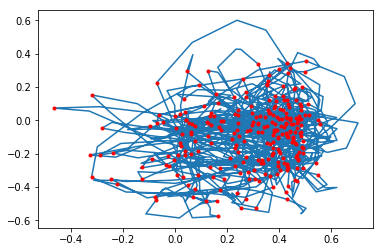

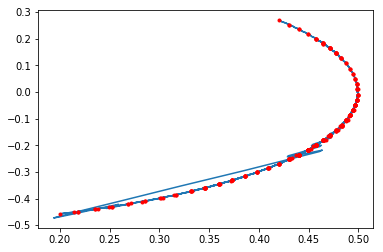

In [36]:
n = 74
plt.figure(1)
plt.plot(x[n][0], x[n][1])
plt.plot(x[n][0, 2::4], x[n][1, 2::4], '.r')
plt.figure(2)
plt.plot(y_hat[n][0], y_hat[n][1])
plt.plot(y_hat[n][0, 2::4], y_hat[n][1, 2::4], '.r')
plt.figure(3)
plt.plot(y[n][0], y[n][1])
plt.plot(y[n][0, 2::4], y[n][1, 2::4], '.r')
print(val_set['snr'][n])